In [1]:
import pandas as pd
import sys
sys.path.append(r"e:/work/IT/trading/MyCode/BollBacktest")  # Add the directory to the Python path

from BollBacktester import BollBacktester  # Import the class

In [ ]:
filepath = "./data/one_minute.csv"  # Updated to correct relative path
symbol = "GBPUSD"

start1 = "2018-01-01"
end1 = "2018-03-31"
start2 = "2018-04-01"
end2 = "2018-06-30"
start3 = "2018-07-01"
end3 = "2018-09-30"
start4 = "2018-10-01"
end4 = "2018-12-31"

end5 = "2019-06-30"

ptc = 0.00007

__1. Quarter 2018__

In [3]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = start1, end = end1, tc = ptc)
tester

BollBacktester(symbol = EURUSD, start = 2018-01-01, end = 2018-03-31)

In [4]:
tester.download_recent_data("GBP_USD", 100000, "GBP_recent_data_1.csv")

2025-06-18 19:11:21,610 - INFO - setting up API-client for environment practice
2025-06-18 19:11:21,611 - INFO - performing request https://api-fxpractice.oanda.com/v3/instruments/GBP_USD/candles
2025-06-18 19:11:21,613 - DEBUG - Starting new HTTPS connection (1): api-fxpractice.oanda.com:443
2025-06-18 19:11:21,871 - DEBUG - https://api-fxpractice.oanda.com:443 "GET /v3/instruments/GBP_USD/candles?granularity=M1&count=5000 HTTP/1.1" 200 104439
2025-06-18 19:11:24,743 - INFO - performing request https://api-fxpractice.oanda.com/v3/instruments/GBP_USD/candles
2025-06-18 19:11:24,944 - DEBUG - https://api-fxpractice.oanda.com:443 "GET /v3/instruments/GBP_USD/candles?granularity=M1&count=5000&to=2025-06-13T00%3A18%3A00Z HTTP/1.1" 200 103148
2025-06-18 19:11:27,935 - INFO - performing request https://api-fxpractice.oanda.com/v3/instruments/GBP_USD/candles
2025-06-18 19:11:28,134 - DEBUG - https://api-fxpractice.oanda.com:443 "GET /v3/instruments/GBP_USD/candles?granularity=M1&count=5000&to

In [5]:
tester.get_data_oanda("./data/GBP_recent_data_1.csv", "2025-03-11", "2025-04-03")

In [6]:
tester.data

,price,spread,returns
time,,,
2025-03-12 12:28:00,1.29494,0.0,NaN
2025-03-12 12:29:00,1.29493,0.0,-0.000008
2025-03-12 12:30:00,1.29608,0.0,0.000888
2025-03-12 12:31:00,1.29705,0.0,0.000748
2025-03-12 12:32:00,1.29695,0.0,-0.000077
...,...,...,...
2025-04-03 23:55:00,1.30916,0.0,-0.000164
2025-04-03 23:56:00,1.30897,0.0,-0.000145
2025-04-03 23:57:00,1.30884,0.0,-0.000099


In [7]:
tester.data.columns

Index(['price', 'spread', 'returns'], dtype='object')

In [8]:
tester.optimize_strategy((51, 301, 5), (51,301, 5), (2, 4, 1), metric = "Multiple") # keep dev constant (2)

Devs range: [2, 3]
First 5 combinations: [(51, 51, 2), (51, 51, 3), (51, 56, 2), (51, 56, 3), (51, 61, 2)]
Results overview head:
   Freq  Windows  Devs
0    51       51     2
1    51       51     3
2    51       56     2
3    51       56     3
4    51       61     2
Frequency: 51 | Windows: 151 | Devs: 2 | Multiple: 1.013361
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 51min | WINDOW = 151
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.022598
Multiple (Buy-and-Hold):     1.022734
--------------------------------------
Out-/Underperformance:       -0.000136


CAGR:                        0.723105
Annualized Mean:             0.513283
Annualized Std:              0.042846
Sharpe Ratio:                11.97962
Sortino Ratio:               17.255618
Maximum Drawdown:            0.017689
Calmar Ratio:                40.878934
Max Drawdown Duration:       4 Days
Kelly

In [9]:
q1 = tester.results_overview
q1

,Freq,Windows,Devs,Performance
0,51,51,2,1.002829
1,51,51,3,0.991820
2,51,56,2,1.001700
3,51,56,3,0.992264
4,51,61,2,1.000590
...,...,...,...,...
4995,296,286,3,1.000000
4996,296,291,2,1.000000
4997,296,291,3,1.000000
4998,296,296,2,1.000000


2025-06-18 19:13:56,626 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-18 19:13:56,629 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-18 19:13:56,642 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0.
2025-06-18 19:13:56,643 - DEBUG - findfont: score(FontEntry(fname='C:\\Users\\fuji\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05
2025-06-18 19:13:56,645 - DEBUG - findfont: score(FontEntry(fname='C:\\Users\\fuji\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', 

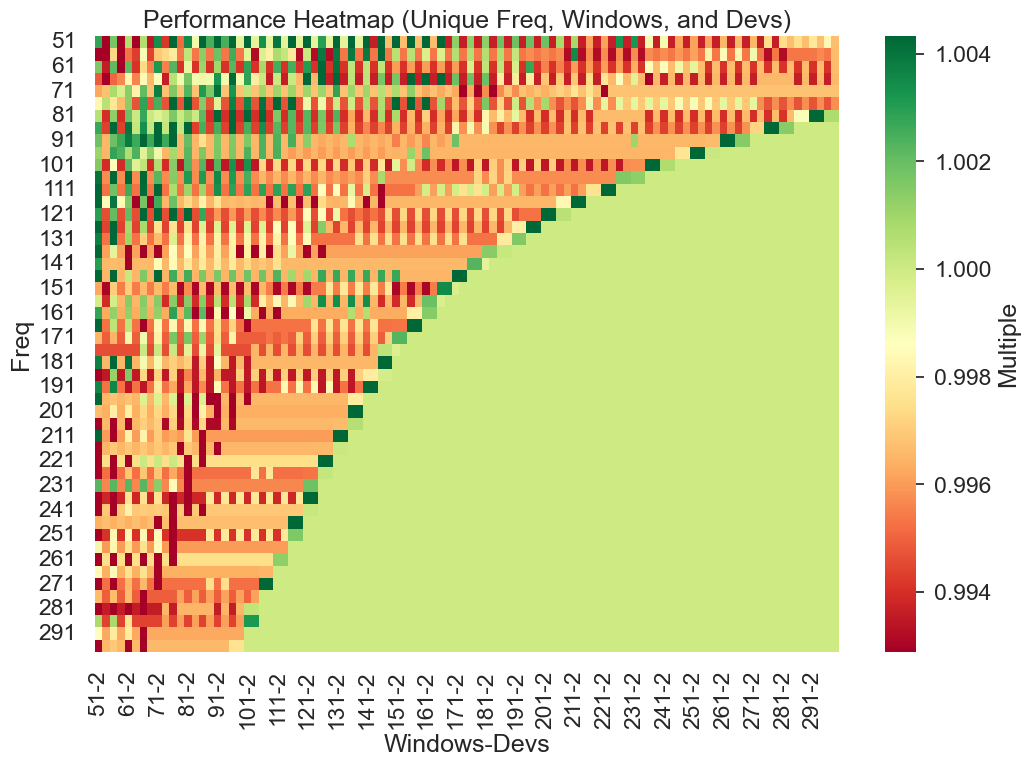

In [10]:
tester.visualize_many()

In [11]:
print(tester.results_overview.head())

   Freq  Windows  Devs  Performance
0    51       51     2     1.002829
1    51       51     3     0.991820
2    51       56     2     1.001700
3    51       56     3     0.992264
4    51       61     2     1.000590


In [12]:
q1 = tester.results_overview
q1

,Freq,Windows,Devs,Performance
0,51,51,2,1.002829
1,51,51,3,0.991820
2,51,56,2,1.001700
3,51,56,3,0.992264
4,51,61,2,1.000590
...,...,...,...,...
4995,296,286,3,1.000000
4996,296,291,2,1.000000
4997,296,291,3,1.000000
4998,296,296,2,1.000000


__2. Quarter 2018__

In [13]:
tester.get_data_oanda("./data/GBP_recent_data_1.csv", "2025-04-03", "2025-04-29")

In [14]:
tester.optimize_strategy((51, 301, 5), (51, 301, 5), (2, 3, 1), metric = "Multiple") 

Devs range: [2]
First 5 combinations: [(51, 51, 2), (51, 56, 2), (51, 61, 2), (51, 66, 2), (51, 71, 2)]
Results overview head:
   Freq  Windows  Devs
0    51       51     2
1    51       56     2
2    51       61     2
3    51       66     2
4    51       71     2
Frequency: 86 | Windows: 121 | Devs: 2 | Multiple: 1.012761
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 86min | WINDOW = 121
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.007179
Multiple (Buy-and-Hold):     1.10564
--------------------------------------
Out-/Underperformance:       -0.098461


CAGR:                        0.166126
Annualized Mean:             0.151886
Annualized Std:              0.02918
Sharpe Ratio:                5.205101
Sortino Ratio:               7.587235
Maximum Drawdown:            0.004894
Calmar Ratio:                33.945158
Max Drawdown Duration:       5 Days
Kelly Crite

2025-06-18 19:15:23,599 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001F810F14130>


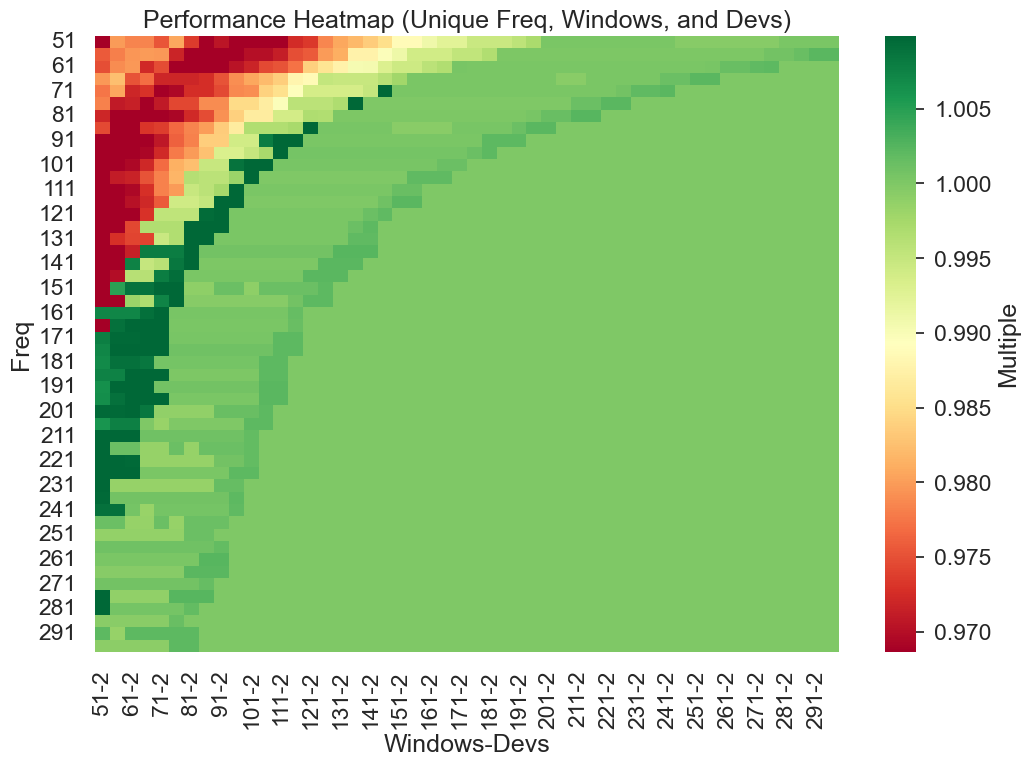

In [15]:
tester.visualize_many()

In [16]:
q2 = tester.results_overview
q2

,Freq,Windows,Devs,Performance
0,51,51,2,0.966403
1,51,56,2,0.979768
2,51,61,2,0.978353
3,51,66,2,0.978342
4,51,71,2,0.975359
...,...,...,...,...
2495,296,276,2,1.000000
2496,296,281,2,1.000000
2497,296,286,2,1.000000
2498,296,291,2,1.000000


__3. Quarter 2018__

In [17]:
tester.get_data_oanda("./data/GBP_recent_data_1.csv", "2025-04-29", "2025-05-22")

In [18]:
tester.optimize_strategy((51, 301, 5), (51, 301, 5), (2, 3, 1), metric = "Multiple") 

Devs range: [2]
First 5 combinations: [(51, 51, 2), (51, 56, 2), (51, 61, 2), (51, 66, 2), (51, 71, 2)]
Results overview head:
   Freq  Windows  Devs
0    51       51     2
1    51       56     2
2    51       61     2
3    51       66     2
4    51       71     2
Frequency: 61 | Windows: 111 | Devs: 2 | Multiple: 1.020354
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 61min | WINDOW = 111
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.012545
Multiple (Buy-and-Hold):     0.999159
--------------------------------------
Out-/Underperformance:       0.013386


CAGR:                        0.30715
Annualized Mean:             0.237232
Annualized Std:              0.039785
Sharpe Ratio:                5.962918
Sortino Ratio:               8.758989
Maximum Drawdown:            0.011079
Calmar Ratio:                27.724679
Max Drawdown Duration:       9 Days
Kelly Crite

2025-06-18 19:17:52,090 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001F810E1AC50>


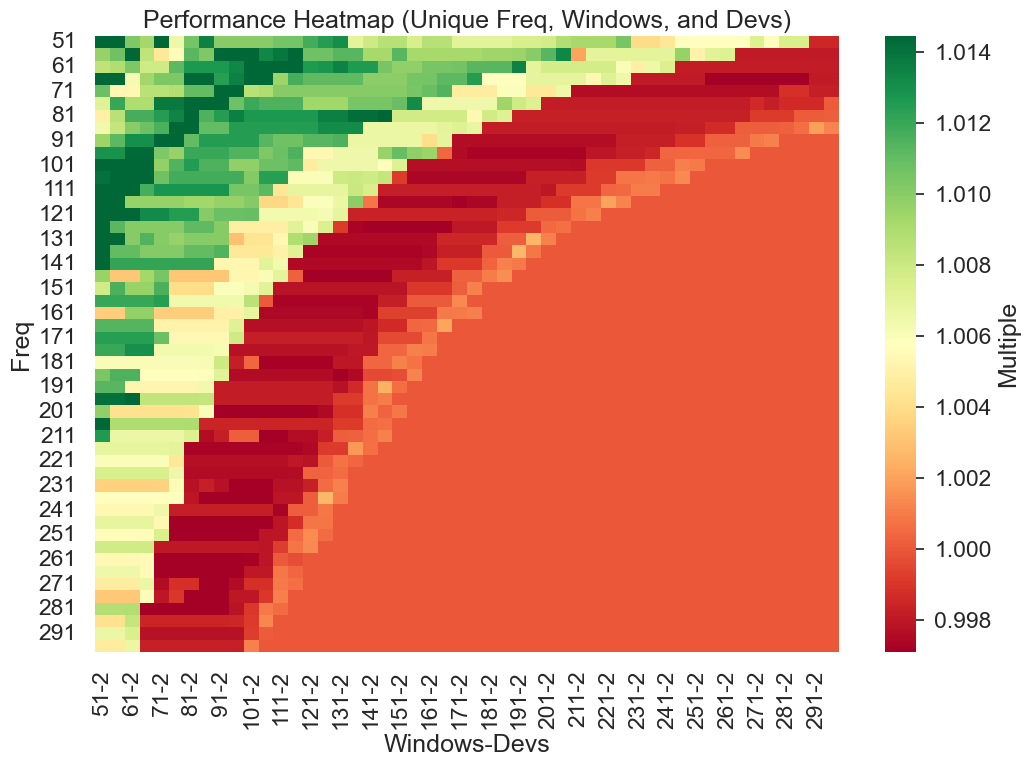

In [19]:
tester.visualize_many()

In [20]:
q3 = tester.results_overview
q3

,Freq,Windows,Devs,Performance
0,51,51,2,1.017784
1,51,56,2,1.015023
2,51,61,2,1.010301
3,51,66,2,1.009246
4,51,71,2,1.014463
...,...,...,...,...
2495,296,276,2,1.000000
2496,296,281,2,1.000000
2497,296,286,2,1.000000
2498,296,291,2,1.000000


__4. Quarter 2018__

In [21]:
tester.get_data_oanda("./data/GBP_recent_data_1.csv", "2025-05-22", "2025-06-17")

In [22]:
tester.optimize_strategy((51, 301, 5), (51, 301, 5), (2, 3, 1), metric = "Multiple") 

Devs range: [2]
First 5 combinations: [(51, 51, 2), (51, 56, 2), (51, 61, 2), (51, 66, 2), (51, 71, 2)]
Results overview head:
   Freq  Windows  Devs
0    51       51     2
1    51       56     2
2    51       61     2
3    51       66     2
4    51       71     2
Frequency: 296 | Windows: 56 | Devs: 2 | Multiple: 1.048756
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 296min | WINDOW = 56
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.048756
Multiple (Buy-and-Hold):     0.9659
--------------------------------------
Out-/Underperformance:       0.082856


CAGR:                        2.80952
Annualized Mean:             1.32686
Annualized Std:              0.039612
Sharpe Ratio:                33.496262
Sortino Ratio:               51.387776
Maximum Drawdown:            0.007273
Calmar Ratio:                386.302176
Max Drawdown Duration:       4 Days
Kelly Crite

2025-06-18 19:18:50,081 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001F817136140>


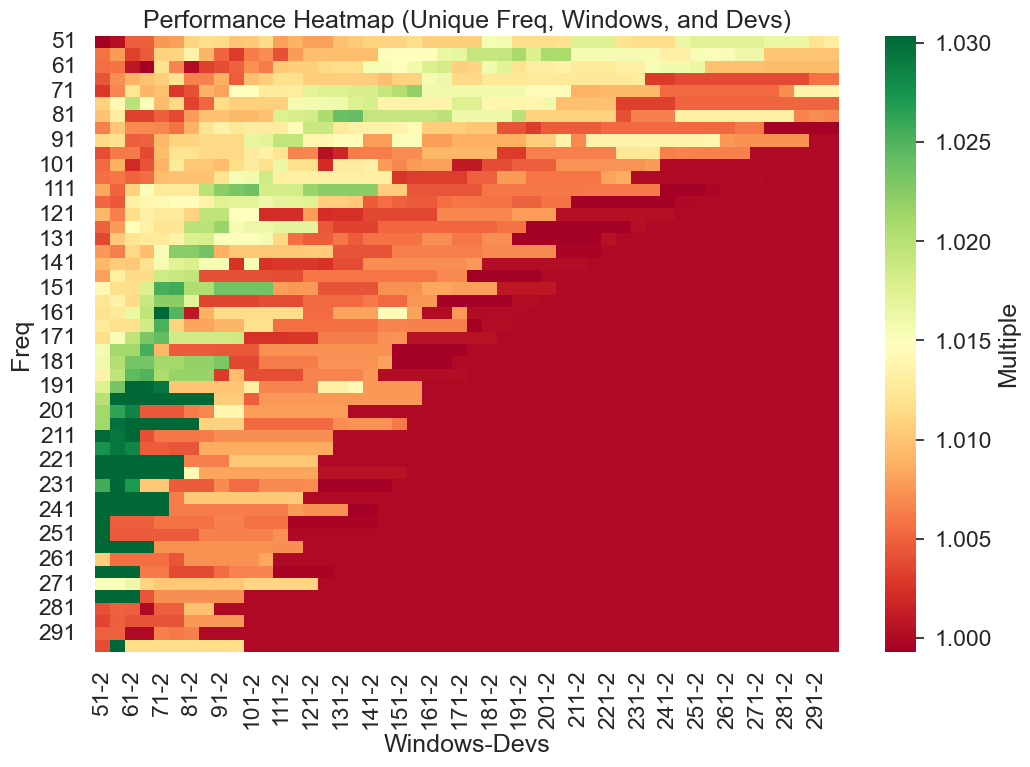

In [23]:
tester.visualize_many()

In [24]:
q4 = tester.results_overview
q4

,Freq,Windows,Devs,Performance
0,51,51,2,0.996834
1,51,56,2,1.000321
2,51,61,2,1.004830
3,51,66,2,1.004788
4,51,71,2,1.007605
...,...,...,...,...
2495,296,276,2,1.000000
2496,296,281,2,1.000000
2497,296,286,2,1.000000
2498,296,291,2,1.000000


__Comparing all four quarters__


In [25]:
# Concatenate DataFrames
comp = pd.concat([q1, q2, q3, q4], axis=1)

# Select relevant columns for output
comp = comp.iloc[:, [0, 1, 2, 3, 7, 11, 15]]  # Adjust column indices as needed

# Rename columns for clarity
comp.columns = ["Freq", "Windows", "Dev", "Performance_Q1", "Performance_Q2", "Performance_Q3", "Performance_Q4"]

comp = comp.dropna()

# Calculate the mean of performance columns
comp["Score1"] = comp[["Performance_Q1", "Performance_Q2", "Performance_Q3", "Performance_Q4"]].mean(axis=1)
comp

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1
0,51,51,2,1.002829,0.966403,1.017784,0.996834,0.995962
1,51,51,3,0.991820,0.979768,1.015023,1.000321,0.996733
2,51,56,2,1.001700,0.978353,1.010301,1.004830,0.998796
3,51,56,3,0.992264,0.978342,1.009246,1.004788,0.996160
4,51,61,2,1.000590,0.975359,1.014463,1.007605,0.999504
...,...,...,...,...,...,...,...,...
2495,171,286,3,1.000000,1.000000,1.000000,1.000000,1.000000
2496,171,291,2,1.000000,1.000000,1.000000,1.000000,1.000000
2497,171,291,3,1.000000,1.000000,1.000000,1.000000,1.000000
2498,171,296,2,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
comp.iloc[:, 3:7].rank(ascending = False)

,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4
0,140.0,2462.0,11.0,2500.0
1,2499.0,2359.0,44.0,1306.0
2,232.0,2373.0,255.0,1114.0
3,2491.0,2374.0,331.0,1115.0
4,342.0,2390.0,50.0,753.0
...,...,...,...,...
2495,728.0,1351.5,1391.5,1880.0
2496,728.0,1351.5,1391.5,1880.0
2497,728.0,1351.5,1391.5,1880.0
2498,728.0,1351.5,1391.5,1880.0


In [27]:
comp["Score2"] = (comp.iloc[:, 3:7].rank(ascending = False)**2).mean(axis = 1) # mean rank
comp

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1,Score2
0,51,51,2,1.002829,0.966403,1.017784,0.996834,0.995962,3082791.250
1,51,51,3,0.991820,0.979768,1.015023,1.000321,0.996733,3379363.500
2,51,56,2,1.001700,0.978353,1.010301,1.004830,0.998796,1747743.500
3,51,56,3,0.992264,0.978342,1.009246,1.004788,0.996160,3298435.750
4,51,61,2,1.000590,0.975359,1.014463,1.007605,0.999504,1599643.250
...,...,...,...,...,...,...,...,...,...
2495,171,286,3,1.000000,1.000000,1.000000,1.000000,1.000000,1956802.125
2496,171,291,2,1.000000,1.000000,1.000000,1.000000,1.000000,1956802.125
2497,171,291,3,1.000000,1.000000,1.000000,1.000000,1.000000,1956802.125
2498,171,296,2,1.000000,1.000000,1.000000,1.000000,1.000000,1956802.125


In [28]:
comp.sort_values(by = "Score1", ascending = False).head(20)

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1,Score2
1901,146,51,3,0.996485,1.009011,1.005312,1.047363,1.014543,8.247119e+05
1900,146,51,2,1.007028,1.009011,1.005312,1.036143,1.014373,9.303562e+04
1850,141,176,2,1.002296,1.009608,1.005768,1.039344,1.014254,9.214838e+04
1600,131,51,2,1.003736,1.009824,1.012604,1.030148,1.014078,6.493812e+03
1602,131,56,2,1.004734,1.010791,1.006615,1.034031,1.014043,6.007475e+04
2053,151,181,3,1.000000,1.000944,1.007827,1.043894,1.013166,1.846438e+05
1750,136,176,2,0.996119,1.010424,1.007411,1.038686,1.013160,8.480484e+05
1751,136,176,3,0.996119,1.010424,1.007411,1.038686,1.013160,8.480484e+05
2451,171,176,3,1.000000,0.999173,1.004705,1.048756,1.013158,1.441759e+06
2052,151,181,2,1.000000,1.000944,1.007756,1.043894,1.013149,1.866038e+05


In [29]:
comp.sort_values(by = "Score2", ascending = True).head(20)

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1,Score2
1600,131,51,2,1.003736,1.009824,1.012604,1.030148,1.014078,6493.8125
708,86,71,2,1.006201,1.012573,1.010857,1.019568,1.012300,16211.6250
1004,101,61,2,1.002169,1.010204,1.011540,1.025309,1.012305,17650.0625
1204,111,61,2,1.002616,1.012352,1.010802,1.024183,1.012488,19947.5625
1202,111,56,2,1.001871,1.009676,1.012402,1.019454,1.010851,20966.6250
905,96,61,3,1.002368,1.008542,1.012109,1.017280,1.010075,21918.0625
1400,121,51,2,1.002954,1.006417,1.011296,1.017604,1.009568,22345.8125
1500,126,51,2,1.007132,1.009629,1.009807,1.021063,1.011908,25883.5625
806,91,66,2,1.004557,1.011306,1.010086,1.017639,1.010897,26140.5000
412,71,81,2,1.002318,1.010000,1.010699,1.019320,1.010585,26186.1250


## Backtesting / Forward Testing a stable Strategy

In [30]:
tester.get_data_oanda("./data/GBP_recent_data_1.csv", "2025-03-12", "2025-06-17")

In [ ]:
tester.export_resampled_data(freq=141, window=131, dev=2, file_name="one_minute_resampled_data.csv")

In [31]:
tester.test_strategy(131, 51, 2)

SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 131min | WINDOW = 51
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.021676
Multiple (Buy-and-Hold):     1.033375
--------------------------------------
Out-/Underperformance:       -0.011699


CAGR:                        0.089884
Annualized Mean:             0.089188
Annualized Std:              0.045111
Sharpe Ratio:                1.97707
Sortino Ratio:               2.839764
Maximum Drawdown:            0.032673
Calmar Ratio:                2.751054
Max Drawdown Duration:       39 Days
Kelly Criterion:             44.325209


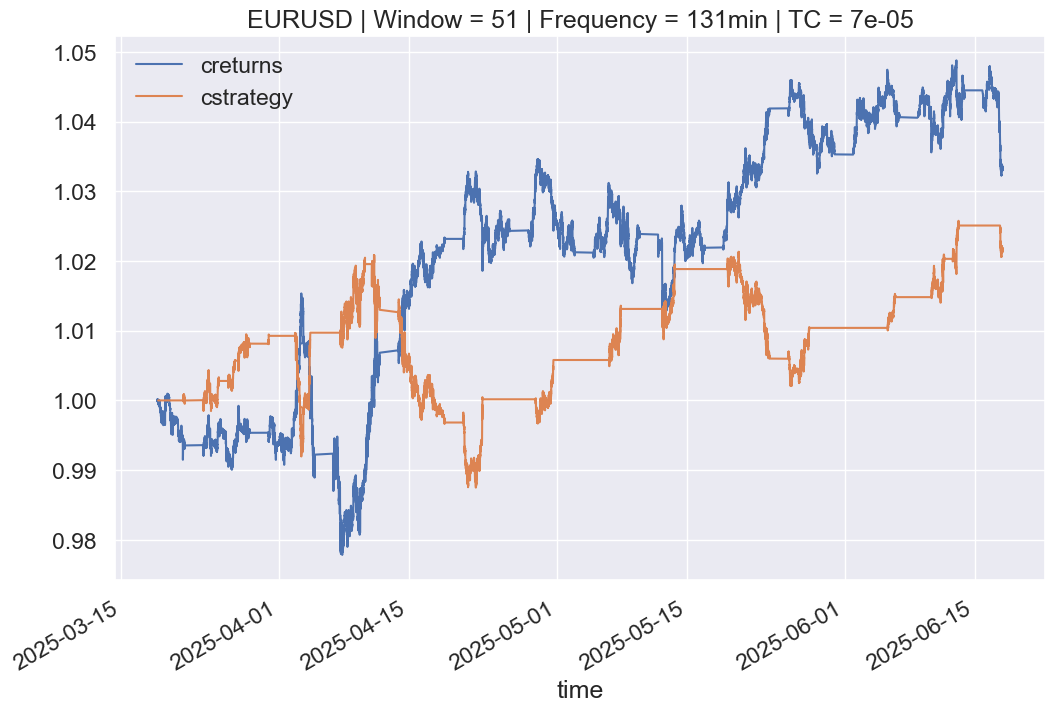

In [32]:
tester.plot_results()

In [33]:
tester.add_leverage(50, sl = -0.4)

SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 131min | WINDOW = 51
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.61648
Multiple (Buy-and-Hold):     1.033375
--------------------------------------
Out-/Underperformance:       0.583105


CAGR:                        5.873004
Annualized Mean:             1.997404
Annualized Std:              1.759267
Sharpe Ratio:                1.135361
Sortino Ratio:               1.608565
Maximum Drawdown:            0.593701
Calmar Ratio:                9.8922
Max Drawdown Duration:       40 Days
Kelly Criterion:             1.14452


In [ ]:
tester.plot_results(leverage=True)

__Forward Testing__

In [ ]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = "2019-01-01", end = "2019-12-31", tc = ptc)
tester

In [ ]:
tester.test_strategy(141, 131, 2)

In [ ]:
tester.add_leverage(50, sl = -0.4)

In [ ]:
tester.plot_results()

In [ ]:
tester.plot_results(leverage=True)

__Iterative Testing__

In [ ]:
import sys
sys.path.append(r"../../MyCode")  # Add the relative path to the Python path
import IterativeBacktest as IB

In [ ]:
bc = IB.IterativeBacktest(symbol, "2018-01-18", "2018-03-30", 100000, use_spread = True)

In [ ]:
bc.data

In [ ]:
bc.test_boll_strategy(131, 2)